# Assignment
#### Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

##### R&D Spend -- Research and devolop spend in the past few years
##### Administration -- spend on administration in the past few years
##### Marketing Spend -- spend on Marketing in the past few years
##### State -- states from which data is collected
##### Profit  -- profit of each state in the past few years


In [1]:
# Import Libraries
import pandas as pd 
import numpy as np
from scipy import stats  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Check out the Data

In [2]:
df = pd.read_csv(r'C:\Users\PRANAV\Desktop\lms\Multi Linear Regression\50_Startups.csv')


In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### EDA

In [4]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


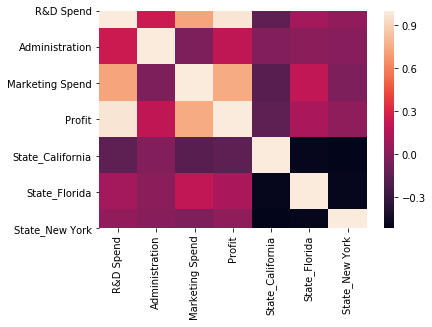

In [16]:
sns.heatmap(df.corr())

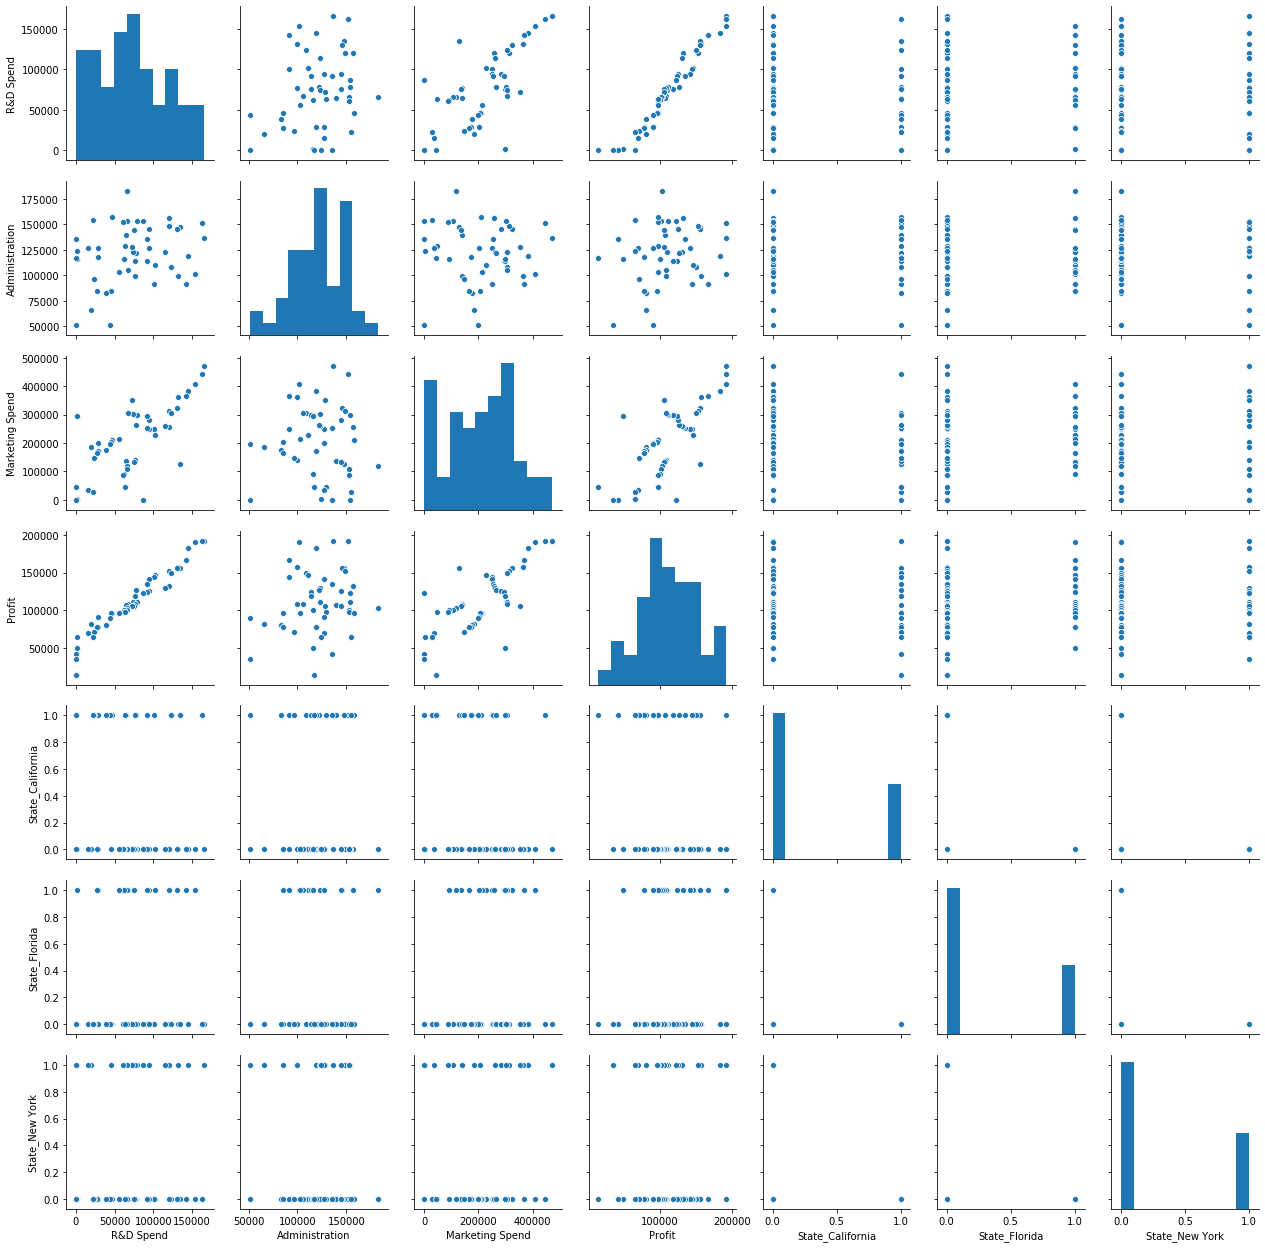

In [17]:
sns.pairplot(df)

In [5]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [6]:
States = ['State']
df = pd.get_dummies(df,columns=States)

In [7]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


### Training a Linear Regression Model

In [8]:
# X and y arrays
X = df.drop('Profit',axis=1)
y = df['Profit']


### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

In [11]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=Tru

In [12]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
p = lm.predict(X_test)

In [14]:
from sklearn.metrics import r2_score

In [15]:
R2 = r2_score(y_test,p)
print('R2 :',R2)

R2 : 0.9797778038835281
